In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import mutual_info_classif

In [2]:
df=pd.read_csv(r"D:\dataset\credit_card_approval.csv")

In [3]:
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB,BEGIN_MONTHS,STATUS,TARGET
0,5065438,F,Y,N,2+ children,270000.0,Secondary / secondary special,Married,With parents,-13258,-2300,1,0,0,0,Managers,-6,C,0
1,5142753,F,N,N,No children,81000.0,Secondary / secondary special,Single / not married,House / apartment,-17876,-377,1,1,1,0,Private service staff,-4,0,0
2,5111146,M,Y,Y,No children,270000.0,Higher education,Married,House / apartment,-19579,-1028,1,0,1,0,Laborers,0,C,0
3,5010310,F,Y,Y,1 children,112500.0,Secondary / secondary special,Married,House / apartment,-15109,-1956,1,0,0,0,Core staff,-3,0,0
4,5010835,M,Y,Y,2+ children,139500.0,Secondary / secondary special,Married,House / apartment,-17281,-5578,1,1,0,0,Drivers,-29,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537662,5142999,M,Y,N,1 children,166500.0,Secondary / secondary special,Married,With parents,-12372,-5401,1,0,1,0,Core staff,-8,0,0
537663,5010773,F,N,Y,No children,135000.0,Higher education,Married,With parents,-14160,-4635,1,0,0,0,Sales staff,-8,0,0
537664,5105601,M,N,Y,No children,180000.0,Higher education,Married,House / apartment,-24204,-2462,1,0,0,0,Private service staff,-7,0,0
537665,5132833,M,Y,N,No children,220500.0,Secondary / secondary special,Married,House / apartment,-22647,-3847,1,0,1,0,Laborers,-1,0,0


In [4]:
df=df.drop(['STATUS','BEGIN_MONTHS'],axis=1)

In [5]:
df.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
JOB                    0
TARGET                 0
dtype: int64

In [6]:
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB,TARGET
0,5065438,F,Y,N,2+ children,270000.0,Secondary / secondary special,Married,With parents,-13258,-2300,1,0,0,0,Managers,0
1,5142753,F,N,N,No children,81000.0,Secondary / secondary special,Single / not married,House / apartment,-17876,-377,1,1,1,0,Private service staff,0
2,5111146,M,Y,Y,No children,270000.0,Higher education,Married,House / apartment,-19579,-1028,1,0,1,0,Laborers,0
3,5010310,F,Y,Y,1 children,112500.0,Secondary / secondary special,Married,House / apartment,-15109,-1956,1,0,0,0,Core staff,0
4,5010835,M,Y,Y,2+ children,139500.0,Secondary / secondary special,Married,House / apartment,-17281,-5578,1,1,0,0,Drivers,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537662,5142999,M,Y,N,1 children,166500.0,Secondary / secondary special,Married,With parents,-12372,-5401,1,0,1,0,Core staff,0
537663,5010773,F,N,Y,No children,135000.0,Higher education,Married,With parents,-14160,-4635,1,0,0,0,Sales staff,0
537664,5105601,M,N,Y,No children,180000.0,Higher education,Married,House / apartment,-24204,-2462,1,0,0,0,Private service staff,0
537665,5132833,M,Y,N,No children,220500.0,Secondary / secondary special,Married,House / apartment,-22647,-3847,1,0,1,0,Laborers,0


In [7]:
c_c = df.select_dtypes(include=['object']).columns
c_c

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'JOB'],
      dtype='object')

In [8]:
n_c = df.select_dtypes(exclude=['object']).columns
n_c

Index(['ID', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'TARGET'],
      dtype='object')

In [9]:
unique_values = {}
for col in df.columns:
    unique_values[col]=df[col].unique()
for column, values in unique_values.items():
    print(f"Column: {column}")
    print("Unique Values:")
    print(values)
    print("\n")

Column: ID
Unique Values:
[5065438 5142753 5111146 ... 5090938 5116980 5045855]


Column: CODE_GENDER
Unique Values:
['F' 'M']


Column: FLAG_OWN_CAR
Unique Values:
['Y' 'N']


Column: FLAG_OWN_REALTY
Unique Values:
['N' 'Y']


Column: CNT_CHILDREN
Unique Values:
['2+ children' 'No children' '1 children']


Column: AMT_INCOME_TOTAL
Unique Values:
[ 270000.    81000.   112500.   139500.   144000.   180000.   405000.
  135000.    99000.   103500.   225000.   171000.   202500.    67500.
  121500.   560250.    74250.    90000.   324000.   391500.   292500.
  229500.   157500.    94500.   148500.   450000.    45000.   382500.
  126000.   315000.   306000.   247500.   675000.    36000.   562500.
  337500.   360000.   211500.   119250.   216000.   122400.   220500.
  193500.   427500.    63000.    76500.   472500.   495000.    95850.
   54000.   459000.   540000.   265500.   146250.   108000.   283500.
  310500.   130500.   252000.   234000.   198000.   166500.   256500.
  153000.   207000.  

In [10]:
df['CNT_CHILDREN'] = df['CNT_CHILDREN'].map({'2+ children': '3','No children': '0','1 children': '1'})
df['NAME_EDUCATION_TYPE']=df['NAME_EDUCATION_TYPE'].map({'Secondary / secondary special':'Secondary','Higher education':'Higher education', 'Incomplete higher':'Incomplete higher','Lower secondary':'Lower secondary', 'Academic degree':'Academic degree'})
df['NAME_HOUSING_TYPE']=df['NAME_HOUSING_TYPE'].map({'With parents':'Home', 'House / apartment':'Home', 'Rented apartment':'Rented apartment','Municipal apartment':'Municipal apartment', 'Co-op apartment':'Co-op apartment', 'Office apartment':'Office apartment'})
df['NAME_FAMILY_STATUS']=df['NAME_FAMILY_STATUS'].map({'Married':'Married', 'Single / not married':'Single', 'Civil marriage':'Civil marriage','Separated':'Separated','Widow':'Widow'})

In [11]:
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB,TARGET
0,5065438,F,Y,N,3,270000.0,Secondary,Married,Home,-13258,-2300,1,0,0,0,Managers,0
1,5142753,F,N,N,0,81000.0,Secondary,Single,Home,-17876,-377,1,1,1,0,Private service staff,0
2,5111146,M,Y,Y,0,270000.0,Higher education,Married,Home,-19579,-1028,1,0,1,0,Laborers,0
3,5010310,F,Y,Y,1,112500.0,Secondary,Married,Home,-15109,-1956,1,0,0,0,Core staff,0
4,5010835,M,Y,Y,3,139500.0,Secondary,Married,Home,-17281,-5578,1,1,0,0,Drivers,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537662,5142999,M,Y,N,1,166500.0,Secondary,Married,Home,-12372,-5401,1,0,1,0,Core staff,0
537663,5010773,F,N,Y,0,135000.0,Higher education,Married,Home,-14160,-4635,1,0,0,0,Sales staff,0
537664,5105601,M,N,Y,0,180000.0,Higher education,Married,Home,-24204,-2462,1,0,0,0,Private service staff,0
537665,5132833,M,Y,N,0,220500.0,Secondary,Married,Home,-22647,-3847,1,0,1,0,Laborers,0


In [12]:
df['DAYS_EMPLOYED']=df['DAYS_EMPLOYED'].abs()
df['DAYS_BIRTH']=df['DAYS_BIRTH'].abs()

In [13]:
df['DAYS_EMPLOYED']

0         2300
1          377
2         1028
3         1956
4         5578
          ... 
537662    5401
537663    4635
537664    2462
537665    3847
537666    4979
Name: DAYS_EMPLOYED, Length: 537667, dtype: int64

In [14]:
df['DAYS_BIRTH']

0         13258
1         17876
2         19579
3         15109
4         17281
          ...  
537662    12372
537663    14160
537664    24204
537665    22647
537666    20082
Name: DAYS_BIRTH, Length: 537667, dtype: int64

This histogram visualizes the distribution of income in your dataset. It helps to understand the range and frequency of income levels among the individuals:

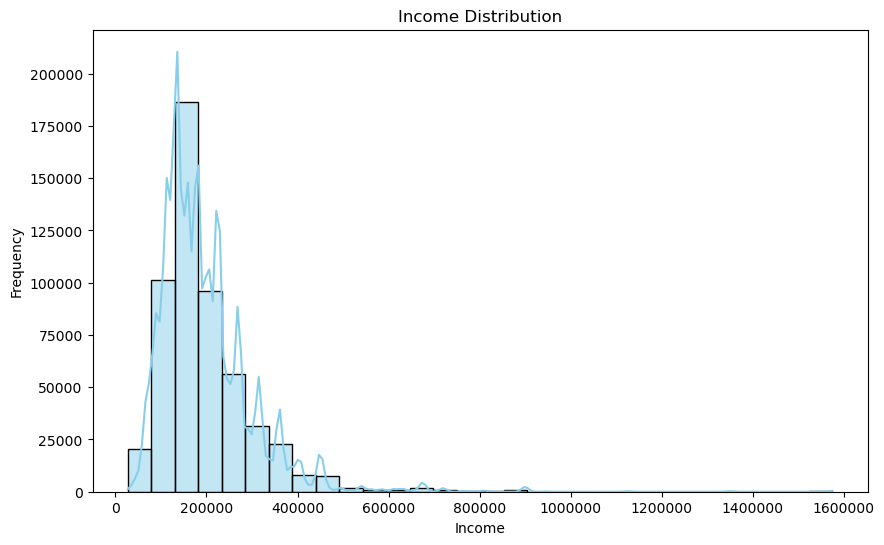

In [15]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(df['AMT_INCOME_TOTAL'], bins=30, kde=True, color='skyblue')
# Format x-axis ticks to display original numbers
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

This bar chart shows the distribution of education levels among the individuals. It provides insights into the education background of the dataset:

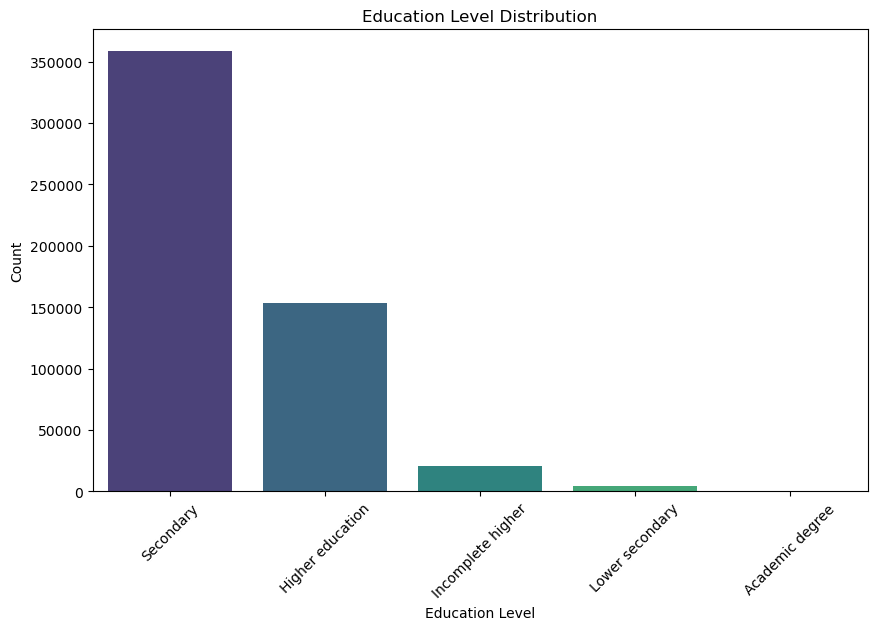

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='NAME_EDUCATION_TYPE', data=df, palette='viridis')
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

A boxplot visualizes the distribution of the 'Days Employed' column, helping to identify outliers and the overall spread of employment durations:

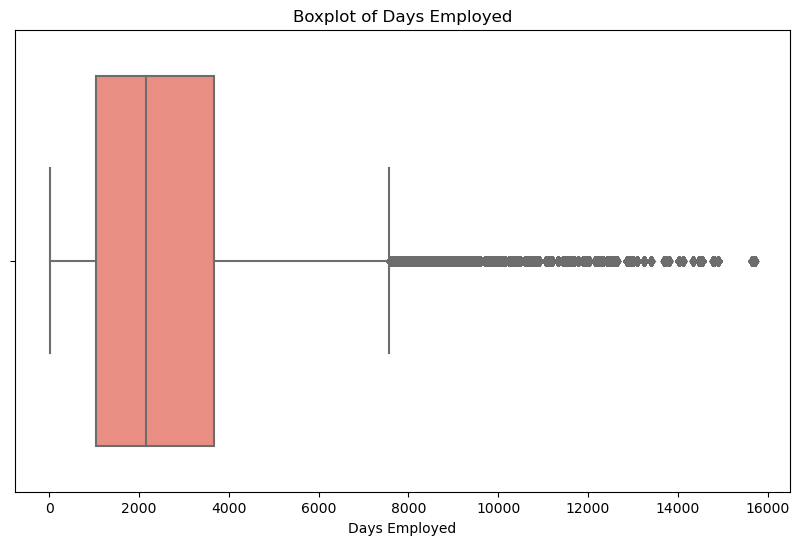

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='DAYS_EMPLOYED', data=df, color='salmon')
plt.title('Boxplot of Days Employed')
plt.xlabel('Days Employed')
plt.show()

This pie chart illustrates the distribution of genders in the dataset, providing a clear visual representation of the proportion of males and females:

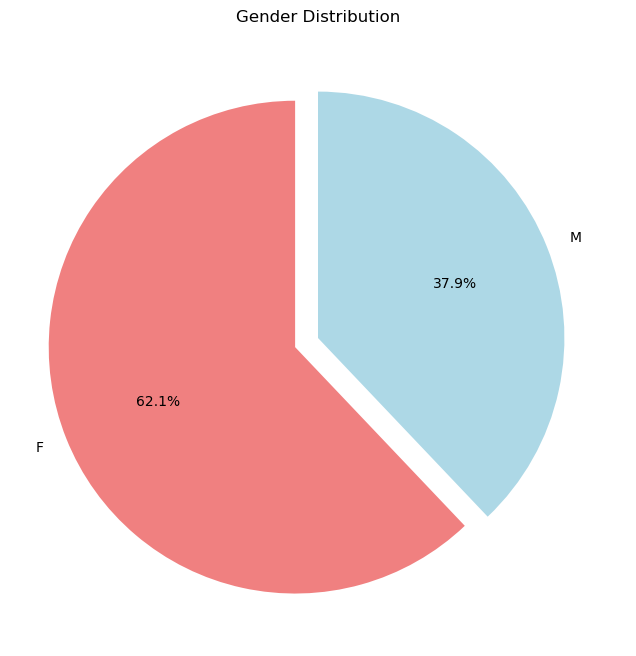

In [18]:
plt.figure(figsize=(8, 8))
df['CODE_GENDER'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'lightblue'], explode=(0.1, 0), startangle=90)
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

In [19]:
column_name = 'DAYS_EMPLOYED'
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
print(df)

             ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY CNT_CHILDREN  \
0       5065438           F            Y               N            3   
1       5142753           F            N               N            0   
2       5111146           M            Y               Y            0   
3       5010310           F            Y               Y            1   
4       5010835           M            Y               Y            3   
...         ...         ...          ...             ...          ...   
537662  5142999           M            Y               N            1   
537663  5010773           F            N               Y            0   
537664  5105601           M            N               Y            0   
537665  5132833           M            Y               N            0   
537666  5135381           F            N               Y            0   

        AMT_INCOME_TOTAL NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
0               270000.0           Secondary            

In [20]:
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB,TARGET
0,5065438,F,Y,N,3,270000.0,Secondary,Married,Home,13258,2300,1,0,0,0,Managers,0
1,5142753,F,N,N,0,81000.0,Secondary,Single,Home,17876,377,1,1,1,0,Private service staff,0
2,5111146,M,Y,Y,0,270000.0,Higher education,Married,Home,19579,1028,1,0,1,0,Laborers,0
3,5010310,F,Y,Y,1,112500.0,Secondary,Married,Home,15109,1956,1,0,0,0,Core staff,0
4,5010835,M,Y,Y,3,139500.0,Secondary,Married,Home,17281,5578,1,1,0,0,Drivers,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537662,5142999,M,Y,N,1,166500.0,Secondary,Married,Home,12372,5401,1,0,1,0,Core staff,0
537663,5010773,F,N,Y,0,135000.0,Higher education,Married,Home,14160,4635,1,0,0,0,Sales staff,0
537664,5105601,M,N,Y,0,180000.0,Higher education,Married,Home,24204,2462,1,0,0,0,Private service staff,0
537665,5132833,M,Y,N,0,220500.0,Secondary,Married,Home,22647,3847,1,0,1,0,Laborers,0


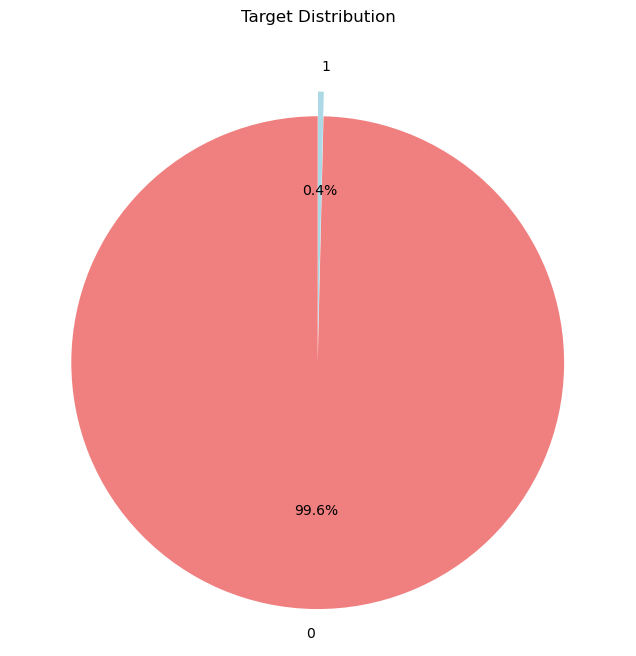

In [21]:
plt.figure(figsize=(8, 8))
df['TARGET'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'lightblue'], explode=(0.1, 0), startangle=90)
plt.title('Target Distribution')
plt.ylabel('')
plt.show()

In [22]:
X = df.drop('TARGET', axis=1)
y = df['TARGET']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Use RandomOverSampler to oversample the minority class in the training set
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)
# Create a new DataFrame with the oversampled data
df= pd.DataFrame(X_resampled, columns=X.columns)
df['TARGET'] = y_resampled

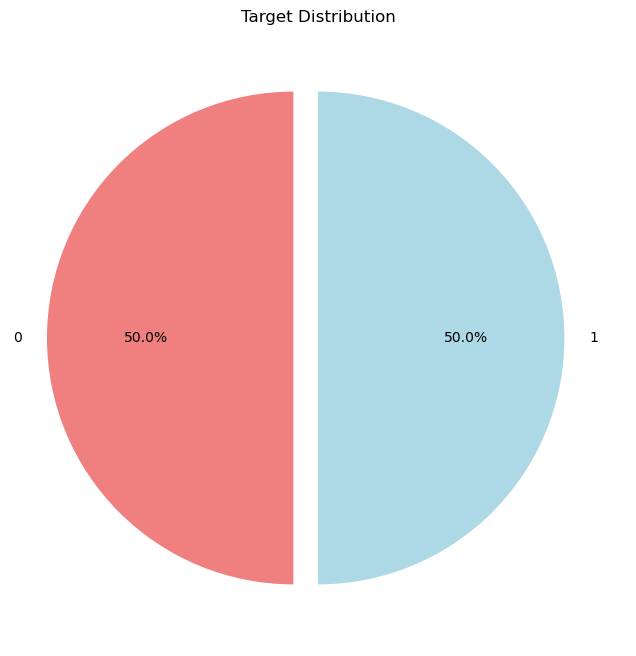

In [23]:
#AFTER OVERSAMPLING DISTRIBUTION: 
plt.figure(figsize=(8, 8))
df['TARGET'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'lightblue'], explode=(0.1, 0), startangle=90)
plt.title('Target Distribution')
plt.ylabel('')
plt.show()

In [24]:
big_col=[]
small_col=[]
for i in df[c_c]:
    length = len(df[i].unique())
    if length > 10:
        big_col.append(i)
    elif length < 10:
        small_col.append(i)

In [25]:
small_col

['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE']

In [26]:
big_col

['JOB']

In [27]:
label_encoder = preprocessing.LabelEncoder()
for i in df[big_col]:
    print(i)
    df[i] = label_encoder.fit_transform(df[i])

JOB


In [28]:
cat_cols = []
for col in df[small_col]:
    if df[col].dtypes == 'object':
        print('check dtypes')
        cat_cols.append('object')
        print(cat_cols)
        
if 'object' in cat_cols:
    cat = df.select_dtypes(include='O').keys()
    cat_data = df[cat]
    for column in cat_data.columns:
        tempdf = pd.get_dummies(df[column], prefix=column)
        df_new = pd.merge(left=df,right=tempdf,left_index=True,right_index=True)
        df = df_new.drop(columns=column)

check dtypes
['object']
check dtypes
['object', 'object']
check dtypes
['object', 'object', 'object']
check dtypes
['object', 'object', 'object', 'object']
check dtypes
['object', 'object', 'object', 'object', 'object']
check dtypes
['object', 'object', 'object', 'object', 'object', 'object']
check dtypes
['object', 'object', 'object', 'object', 'object', 'object', 'object']


In [29]:
df

,ID,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB,TARGET,...,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_Home,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment
0,5125235,157500.0,13766,73,1,0,0,0,6,0,...,0,1,0,0,0,0,1,0,0,0
1,5113866,90000.0,16115,985,1,0,0,0,14,0,...,0,1,0,0,0,0,1,0,0,0
2,5086067,202500.0,11800,3303,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,5023748,157500.0,11454,1604,1,0,0,0,4,0,...,0,1,0,0,0,0,1,0,0,0
4,5092247,90000.0,20009,5099,1,1,1,0,8,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811869,5118441,108000.0,16138,431,1,1,0,0,14,1,...,0,1,0,0,0,0,1,0,0,0
811870,5046328,157500.0,15466,2269,1,0,1,0,9,1,...,0,0,0,1,0,0,1,0,0,0
811871,5051160,135000.0,9594,866,1,0,0,0,8,1,...,0,1,0,0,0,0,1,0,0,0
811872,5135344,112500.0,20103,555,1,0,0,0,16,1,...,0,1,0,0,0,0,1,0,0,0


In [30]:
df=df.drop(['ID'],axis=1)

In [31]:
x=df.drop(['TARGET'],axis=1)
y=df['TARGET']

In [32]:
x

,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB,CODE_GENDER_F,CODE_GENDER_M,...,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_Home,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment
0,157500.0,13766,73,1,0,0,0,6,1,0,...,0,1,0,0,0,0,1,0,0,0
1,90000.0,16115,985,1,0,0,0,14,1,0,...,0,1,0,0,0,0,1,0,0,0
2,202500.0,11800,3303,1,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
3,157500.0,11454,1604,1,0,0,0,4,0,1,...,0,1,0,0,0,0,1,0,0,0
4,90000.0,20009,5099,1,1,1,0,8,1,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811869,108000.0,16138,431,1,1,0,0,14,1,0,...,0,1,0,0,0,0,1,0,0,0
811870,157500.0,15466,2269,1,0,1,0,9,1,0,...,0,0,0,1,0,0,1,0,0,0
811871,135000.0,9594,866,1,0,0,0,8,0,1,...,0,1,0,0,0,0,1,0,0,0
811872,112500.0,20103,555,1,0,0,0,16,0,1,...,0,1,0,0,0,0,1,0,0,0


In [33]:
y

0         0
1         0
2         0
3         0
4         0
         ..
811869    1
811870    1
811871    1
811872    1
811873    1
Name: TARGET, Length: 811874, dtype: int64

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=101)

In [35]:
mutual_info = mutual_info_classif(x_train.fillna(0), y_train)
mi_series = pd.Series(mutual_info)
mi_series.index = x_train.columns
mi_series.sort_values(ascending=False)

DAYS_BIRTH                               0.589512
DAYS_EMPLOYED                            0.532317
AMT_INCOME_TOTAL                         0.098273
FLAG_MOBIL                               0.081897
NAME_FAMILY_STATUS_Married               0.070908
FLAG_OWN_REALTY_Y                        0.069779
CODE_GENDER_F                            0.068899
NAME_EDUCATION_TYPE_Secondary            0.068570
CNT_CHILDREN_0                           0.066118
FLAG_OWN_CAR_N                           0.061398
CODE_GENDER_M                            0.056634
NAME_HOUSING_TYPE_Home                   0.056023
FLAG_OWN_CAR_Y                           0.043914
JOB                                      0.037609
FLAG_PHONE                               0.026799
FLAG_OWN_REALTY_N                        0.026039
NAME_EDUCATION_TYPE_Higher education     0.022815
FLAG_WORK_PHONE                          0.018990
CNT_CHILDREN_1                           0.018806
NAME_FAMILY_STATUS_Single                0.010776


<Axes: >

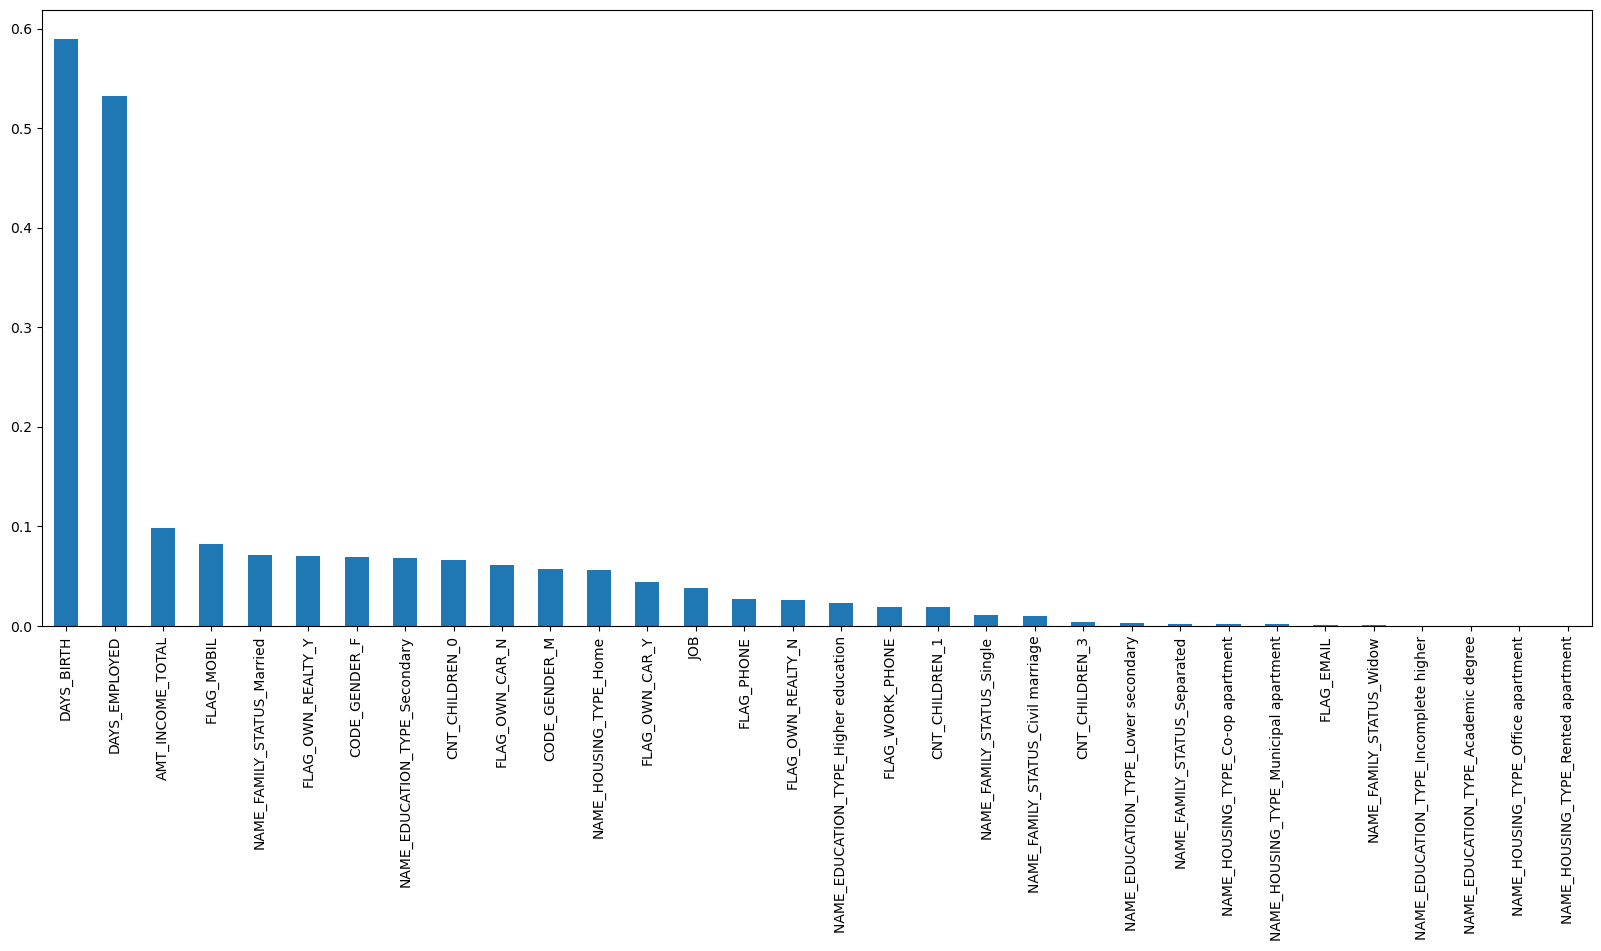

In [36]:
mi_series.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [38]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [40]:
y_pred = rf.predict(x_test)

In [41]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.97


In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     81230
           1       0.95      1.00      0.97     81145

    accuracy                           0.97    162375
   macro avg       0.97      0.97      0.97    162375
weighted avg       0.97      0.97      0.97    162375



XGBOOSTER:

In [44]:
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic',max_depth=3,n_estimators=100,learning_rate=0.1)
xgb_classifier.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [45]:
y_pred = xgb_classifier.predict(x_test)

In [46]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.83


In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84     81230
           1       0.86      0.80      0.83     81145

    accuracy                           0.83    162375
   macro avg       0.84      0.83      0.83    162375
weighted avg       0.84      0.83      0.83    162375

